# Course Project - NBA data analysis

In this project, your task is to answer some **questions** raised by a trouble boss (Ryan?) based on the following NBA datasets.


(1) [Kaggle basketball dataset](https://www.kaggle.com/wyattowalsh/basketball)\
(2) [NBA Basketball Datasets](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/)\
(3) [Kaggle 2020/2021 season data](https://www.kaggle.com/umutalpaydn/nba-20202021-season-player-stats?select=nba2021_per_game.csv)

In [1]:
import pandas as pd
import sqlite3
import numpy as np
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import statsmodels.api as sm
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, r2_score  
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error
from sklearn.decomposition import PCA 

In [2]:
con = sqlite3.connect('datasets/basketball.sqlite')
cur = con.cursor()
    
# SQL select statement using sqlite3 function (returning a list)
cur.execute("SELECT * FROM game")
L=cur.fetchall()
print("List length:", len(L))
print(L[0]) # print the first record in the table "game"

# SQL select statement using Pandas
df = pd.read_sql_query("SELECT * FROM game WHERE SEASON_ID=22020", con)
print("Pandas dataframe size:", len(df))
print(df.iloc[0]) # print the first record in the table "game" of year 2020

List length: 62448
('0024600001', '21946', '1610610035', 'HUS', 'Toronto Huskies', '1946-11-01', 'HUS vs. NYK', 'L', 0, 25.0, None, None, None, None, None, 16.0, 29.0, 0.552, None, None, None, None, None, None, None, None, 66, -2, 0, '1610612752', 'NYK', 'New York Knicks', 'NYK @ HUS', 'W', 0, 24.0, None, None, None, None, None, 20.0, 26.0, 0.769, None, None, None, None, None, None, None, None, 68, 2, 0, '1946-11-01T00:00:00', None, '3', '', '19461101/NYKHUS', '1610610035', '1610612752', '1946', 5.0, None, None, 'Q5  - ', 1.0, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, 'FRIDAY, NOVEMBER 1, 1946', None, '', 'Toronto', 'Huskies', '-', None, None, None, None, '18', None, None, None, None, None, None, None, None, None, 66.0, 'New York', 'Knicks', '-', None, None, None, None, '24', None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, Non

In [3]:
df.head(5)

,GAME_ID,SEASON_ID,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,GAME_DATE,MATCHUP_HOME,WL_HOME,MIN_HOME,FGM_HOME,...,LAST_GAME_VISITOR_TEAM_CITY1,LAST_GAME_VISITOR_TEAM_POINTS,HOME_TEAM_WINS,HOME_TEAM_LOSSES,SERIES_LEADER,VIDEO_AVAILABLE_FLAG,PT_AVAILABLE,PT_XYZ_AVAILABLE,HUSTLE_STATUS,HISTORICAL_STATUS
0,0022000002,22020,1610612747,LAL,Los Angeles Lakers,2020-12-22,LAL vs. LAC,L,240,38.0,...,LAC,106,0.0,1.0,LA Clippers,1.0,1.0,1.0,1.0,0.0
1,0022000001,22020,1610612751,BKN,Brooklyn Nets,2020-12-22,BKN vs. GSW,W,240,42.0,...,GSW,88,2.0,0.0,Brooklyn,1.0,1.0,1.0,1.0,0.0
2,0022000013,22020,1610612755,PHI,Philadelphia 76ers,2020-12-23,PHI vs. WAS,W,240,41.0,...,WAS,98,3.0,0.0,Philadelphia,1.0,1.0,1.0,1.0,0.0
3,0022000015,22020,1610612741,CHI,Chicago Bulls,2020-12-23,CHI vs. ATL,L,240,36.0,...,ATL,81,0.0,1.0,Atlanta,1.0,1.0,1.0,1.0,0.0
4,0022000004,22020,1610612756,PHX,Phoenix Suns,2020-12-23,PHX vs. DAL,W,240,38.0,...,DAL,102,3.0,0.0,Phoenix,1.0,1.0,1.0,1.0,0.0


## (2) NBA Basketball Datasets

The NBA basketball datasets provide you the historically accurate NBA play by play dataset – with information for each team in the league, and for every season since the 2000/2001 season.
- The file is just a CSV file so it is easy to open in Pandas.

# [Your tasks] Dealing With a Difficult Boss

### Tasks

1. [40%] Your boss would like to know the top-3 players of the best [cost–performance ratio](https://en.wikipedia.org/wiki/Price%E2%80%93performance_ratio) in 2020/2021 season, where the cost and the performance can be calculated by 
    - PERFORMANCE: [Efficiency equation](https://en.wikipedia.org/wiki/Efficiency_(basketball)#:~:text=The%20NBA%20publishes%20online%20all%20of%20the%20basic,FG%20%E2%88%92%20Missed%20FT%20-%20TO%29%20%2F%20GP) based on the statistics in the **(3) Kaggle 2020/2021 season data**.
        - You could replace this equation if there is any better option.        
    - COST: Salary in talbe "Player_Salary" of **(1) Kaggle basketball dataset**.
    - You are welcome to develop any better eqaution(s) to estimate the CP ratio to rank the top-3 players.
    
    
    
2. [40%] Your boss would like to know the **winning secret** from the games in 2020/2021. Please give your finding by carefully anaylzing the data in the table "game" of **(1) Kaggle basketball dataset**.
    - For instance, you can say that the **winning secret** to win a game is to **score more than your rival** since the **correlation** between the **winning status (1)** and **score more than your rival (1)** is always ONE (strongly correlated). However, this is definitely a bad idea to tell this **fact** to your boss.
    - After a careful analysis, you may find that the [field goal percentage (FG%)](https://en.wikipedia.org/wiki/Field_goal_percentage) (or any other combinations) is the **winning secret**
    since bilibala bilibala...
 
    
3. [20% / 30%] **Name the most important player** in each team.
    - You could simply use the result in **Task 1** but you may just get the basic mark (<20%) of this question.
    - If you only use **datasets (1) and (3)** to answer this task, the highest mark is 20%.
    - You could try to analyze the data in the **(2) NBA Basketball Datasets** that provides the most detail actions in every game. You will get (up to) 30% if you successfully run your analysis on this dataset.
    
### Submissions

1. Every team is required to submit a jupyter notebook.
2. In the notebook, please answer the questions using the following format.
    - What's your findings? (by text)
        - If there is any novel idea to get this finding, please write them into the jupyter notebook. 
    - How do you conduct your findings? (by Python program)
    - Your submitted codes are used to **support** your findings. You could use some advanced libraries to complete this project, e.g., Scikit-learn, Keras, TensorFlow, Seaborn, etc.
        - The TAs will tell you the list of packages (and versions) that are allowed to use in this project later.

# TASK 1

## NBA efficiency rating
## EFF = (PTS + REB + AST + STL + BLK − Missed FG − Missed FT - TO) / GP

- PTS: points
- REB: rebounds
- TRB：Total Rebounds 
- AST: assists
- STL: steals
- BLK: blocks
- Missed FG:(FGA - FGM)
- FGA: Field Goal Attempts
- FG/FGM: Field Goals
- Missed FT = (FTA - FTM)
- FTA：Free Throw Attempts
- FT：Free Throws 
- TO/TOV: turnovers
- GP: games played
- G: Appearances

In [4]:
per_game = pd.read_csv('datasets/nba2021_per_game.csv')
print(per_game.iloc[0])

Player    Precious Achiuwa
Pos                     PF
Age                     21
Tm                     MIA
G                       28
GS                       2
MP                    14.6
FG                     2.6
FGA                    4.4
FG%                   0.59
3P                     0.0
3PA                    0.0
3P%                    0.0
2P                     2.6
2PA                    4.4
2P%                   0.59
eFG%                  0.59
FT                     1.3
FTA                    2.4
FT%                  0.561
ORB                    1.3
DRB                    2.7
TRB                    4.0
AST                    0.6
STL                    0.4
BLK                    0.5
TOV                    1.0
PF                     1.9
PTS                    6.5
Name: 0, dtype: object


In [5]:
# Number of appearances per player
GP = per_game.groupby('Player').apply(lambda x:x['G'].sum()).to_frame().reset_index()
GP.columns = ['Player', 'G']

In [6]:
per_game['EFF'] = ((per_game['PTS'] + per_game['TRB'] + per_game['AST'] + per_game['STL'] + per_game['BLK'] 
                - (per_game['FGA'] - per_game['FG']) + (per_game['FTA'] - per_game['FT']) + per_game['TOV']))/ per_game['G']

In [7]:
per_game.sort_values(by = "EFF", ascending = False).head(3)

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
277,Kevin Love,PF,32,CLE,2,2,23.0,3.0,9.0,0.333,...,1.0,5.0,6.0,2.5,0.5,0.0,1.5,0.5,9.5,7.25
388,Chasson Randle,G,27,ORL,1,0,19.0,1.0,4.0,0.250,...,0.0,2.0,2.0,5.0,0.0,0.0,1.0,4.0,2.0,7.00
140,Yogi Ferrell,PG,27,CLE,2,0,20.0,4.0,10.5,0.381,...,1.5,2.0,3.5,2.5,1.5,0.5,1.5,2.0,9.5,6.75


In [8]:
salary = pd.read_sql_query("SELECT * FROM Player_Salary", con)
print("Pandas dataframe size:", len(salary))
print(salary.iloc[0])

Pandas dataframe size: 1292
slugSeason                      2020-21
nameTeam                  Atlanta Hawks
namePlayer            Bogdan Bogdanovic
statusPlayer             current roster
isFinalSeason                         0
isWaived                              0
isOnRoster                            1
isNonGuaranteed                       0
isTeamOption                          0
isPlayerOption                        0
typeContractDetail           Guaranteed
value                        18000000.0
Name: 0, dtype: object


In [9]:
salary2020_21 = salary[salary.slugSeason == "2020-21"]
salary2020_21.head()

,slugSeason,nameTeam,namePlayer,statusPlayer,isFinalSeason,isWaived,isOnRoster,isNonGuaranteed,isTeamOption,isPlayerOption,typeContractDetail,value
0,2020-21,Atlanta Hawks,Bogdan Bogdanovic,current roster,0,0,1,0,0,0,Guaranteed,18000000.0
4,2020-21,Atlanta Hawks,Brandon Goodwin,current roster,0,0,1,0,0,0,Guaranteed,1701593.0
6,2020-21,Atlanta Hawks,Bruno Fernando,current roster,0,0,1,0,0,0,Guaranteed,1517981.0
9,2020-21,Atlanta Hawks,Cam Reddish,current roster,0,0,1,0,0,0,Guaranteed,4458000.0
13,2020-21,Atlanta Hawks,Clint Capela,current roster,0,0,1,0,0,0,Guaranteed,16000000.0


In [10]:
# Combine the data of per_game.csv and salary into the same table
new_per_game = per_game.merge(salary2020_21, left_on='Player', right_on='namePlayer', how='left')

In [11]:
show = ['Player','Tm','Pos','EFF','value']
performance_show = new_per_game[show].sort_values(by = ['EFF'],ascending = False)
performance_show.head()

,Player,Tm,Pos,EFF,value
290,Kevin Love,CLE,PF,7.25,31258256.0
405,Chasson Randle,ORL,G,7.00,NaN
148,Yogi Ferrell,CLE,PG,6.75,110998.0
96,Marquese Chriss,GSW,PF,6.25,1824003.0
377,Anžejs Pasečņiks,WAS,C,6.00,NaN


In [12]:
salary2020_21['value'].isnull().count()

523

In [13]:
# Fill in missing values with upward filling method
performance_show['value'] = performance_show['value'].fillna(method='pad')
performance_show.head()

,Player,Tm,Pos,EFF,value
290,Kevin Love,CLE,PF,7.25,31258256.0
405,Chasson Randle,ORL,G,7.00,31258256.0
148,Yogi Ferrell,CLE,PG,6.75,110998.0
96,Marquese Chriss,GSW,PF,6.25,1824003.0
377,Anžejs Pasečņiks,WAS,C,6.00,1824003.0


In [14]:
# rename column
performance_show.rename(columns={'value':'salary'},inplace=True)
performance_show.head()

,Player,Tm,Pos,EFF,salary
290,Kevin Love,CLE,PF,7.25,31258256.0
405,Chasson Randle,ORL,G,7.00,31258256.0
148,Yogi Ferrell,CLE,PG,6.75,110998.0
96,Marquese Chriss,GSW,PF,6.25,1824003.0
377,Anžejs Pasečņiks,WAS,C,6.00,1824003.0


In [15]:
# Because the salary value is too large, the CP_Ratio will be too small, so the final CP_Ratio is expanded to 10^7
performance_show['CP_Ratio']=performance_show['EFF']/performance_show['salary']*(10**7)

In [16]:
performance_show = performance_show.sort_values(by = 'CP_Ratio',ascending=False)
performance_show.head()

,Player,Tm,Pos,EFF,salary,CP_Ratio
148,Yogi Ferrell,CLE,PG,6.750000,110998.0,608.119065
43,Jordan Bell,WAS,C,3.100000,110998.0,279.284311
384,Norvel Pelle,BRK,F-C,1.666667,99020.0,168.316165
385,Norvel Pelle,BRK,F-C,1.666667,99020.0,168.316165
155,Tim Frazier,MEM,PG,1.400000,110998.0,126.128399


In [17]:
# Through describe, find a suitable critical value as the threshold for cost-effective screening
performance_show.describe(percentiles=[.25,.5,.75,.9,.95,.99])

,EFF,salary,CP_Ratio
count,515.000000,5.150000e+02,515.000000
mean,0.848023,8.483742e+06,5.861885
std,0.875056,1.014127e+07,32.810726
min,-0.133333,5.000000e+04,-1.484269
25%,0.406111,1.663861e+06,0.667393
50%,0.614286,3.909902e+06,1.348658
75%,0.945214,1.093487e+07,2.692149
90%,1.490000,2.750000e+07,4.536330
95%,2.027500,3.136887e+07,9.813702
99%,5.821500,4.125492e+07,109.886025


In [18]:
# Select the value with EFF greater than 99% as the threshold for filtering
top3 = performance_show[performance_show['EFF']>= 5.821500].head(3)
top3

,Player,Tm,Pos,EFF,salary,CP_Ratio
148,Yogi Ferrell,CLE,PG,6.75,110998.0,608.119065
96,Marquese Chriss,GSW,PF,6.25,1824003.0,34.265295
15,Kostas Antetokounmpo,LAL,PF,6.00,1824003.0,32.894683


# TASK 2

### Consider the influence of the home and away games on the battle factors, divide the data, and analyze the home and away data separately.

In [19]:
HOME = df.iloc[:,2:27]
AWAY = df.iloc[:,29:53]

In [20]:
HOME.head()

,TEAM_ID_HOME,TEAM_ABBREVIATION_HOME,TEAM_NAME_HOME,GAME_DATE,MATCHUP_HOME,WL_HOME,MIN_HOME,FGM_HOME,FGA_HOME,FG_PCT_HOME,...,FT_PCT_HOME,OREB_HOME,DREB_HOME,REB_HOME,AST_HOME,STL_HOME,BLK_HOME,TOV_HOME,PF_HOME,PTS_HOME
0,1610612747,LAL,Los Angeles Lakers,2020-12-22,LAL vs. LAC,L,240,38.0,81,0.469,...,0.774,8,37,45,22,4,2,19,20.0,109
1,1610612751,BKN,Brooklyn Nets,2020-12-22,BKN vs. GSW,W,240,42.0,92,0.457,...,0.813,13,44,57,24,11,7,20,22.0,125
2,1610612755,PHI,Philadelphia 76ers,2020-12-23,PHI vs. WAS,W,240,41.0,87,0.471,...,0.767,10,37,47,22,11,8,18,25.0,113
3,1610612741,CHI,Chicago Bulls,2020-12-23,CHI vs. ATL,L,240,36.0,87,0.414,...,0.857,8,29,37,20,10,3,17,22.0,104
4,1610612756,PHX,Phoenix Suns,2020-12-23,PHX vs. DAL,W,240,38.0,79,0.481,...,0.704,6,42,48,21,7,7,19,26.0,106


In [21]:
AWAY.head()

,TEAM_ID_AWAY,TEAM_ABBREVIATION_AWAY,TEAM_NAME_AWAY,MATCHUP_AWAY,WL_AWAY,MIN_AWAY,FGM_AWAY,FGA_AWAY,FG_PCT_AWAY,FG3M_AWAY,...,FT_PCT_AWAY,OREB_AWAY,DREB_AWAY,REB_AWAY,AST_AWAY,STL_AWAY,BLK_AWAY,TOV_AWAY,PF_AWAY,PTS_AWAY
0,1610612746,LAC,LA Clippers,LAC @ LAL,W,240,44.0,93,0.473,14,...,0.737,11,29,40,22,10,3,16,29.0,116
1,1610612744,GSW,Golden State Warriors,GSW @ BKN,L,240,37.0,99,0.374,10,...,0.652,13,34,47,26,6,6,18,24.0,99
2,1610612764,WAS,Washington Wizards,WAS @ PHI,L,240,39.0,85,0.459,13,...,0.696,5,35,40,28,7,4,20,26.0,107
3,1610612737,ATL,Atlanta Hawks,ATL @ CHI,W,240,43.0,80,0.538,14,...,0.828,8,38,46,24,6,3,23,29.0,124
4,1610612742,DAL,Dallas Mavericks,DAL @ PHX,L,240,36.0,85,0.424,9,...,0.808,6,33,39,17,6,0,12,23.0,102


### Calculate WIN_RATE of HOME and AWAY

In [22]:
# Use for loop, list and dictionary to write the result into table
groups = HOME.groupby('TEAM_ABBREVIATION_HOME')
results = []
for group_name,group_df in groups:
    WIN = group_df[group_df['WL_HOME']=='W'].count()
    LOSS = group_df[group_df['WL_HOME']=='L'].count()
    GAME = WIN + LOSS
    WIN_RATE = round(WIN/GAME,2)
    WIN_RATE = WIN_RATE[0]
    result = {}
    result[group_name] = WIN_RATE
    results.append(result)
#print(results)
WIN_RATE_HOME = pd.DataFrame(results)
WIN_RATE_HOME.loc['WIN_RATE'] = WIN_RATE_HOME.sum()
WIN_RATE_HOME = WIN_RATE_HOME[-1:].T
WIN_RATE_HOME.reset_index(inplace=True)
WIN_RATE_HOME.rename(columns={"index":"TEAM","WIN_RATE":"WIN_RATE_HOME"},inplace=True)
WIN_RATE_HOME.head()

,TEAM,WIN_RATE_HOME
0,ATL,0.68
1,BKN,0.78
2,BOS,0.58
3,CHA,0.50
4,CHI,0.42


In [23]:
groups1 = AWAY.groupby('TEAM_ABBREVIATION_AWAY')
results1 = []
for group_name1,group_df1 in groups1:
    WIN1 = group_df1[group_df1['WL_AWAY']=='W'].count()
    LOSS1 = group_df1[group_df1['WL_AWAY']=='L'].count()
    GAME1 = WIN1 + LOSS1
    WIN_RATE1 = round(WIN1/GAME1,2)
    WIN_RATE1 = WIN_RATE1[0]
    result1 = {}
    result1[group_name1] = WIN_RATE1
    results1.append(result1)
#print(results1)
WIN_RATE_AWAY = pd.DataFrame(results1)
WIN_RATE_AWAY.loc['WIN_RATE'] = WIN_RATE_AWAY.sum()
WIN_RATE_AWAY = WIN_RATE_AWAY[-1:].T
WIN_RATE_AWAY.reset_index(inplace=True)
WIN_RATE_AWAY.rename(columns={"index":"TEAM","WIN_RATE":"WIN_RATE_AWAY"},inplace=True)
WIN_RATE_AWAY.head()

,TEAM,WIN_RATE_AWAY
0,ATL,0.46
1,BKN,0.57
2,BOS,0.43
3,CHA,0.42
4,CHI,0.44


In [24]:
# seclect wanted columns
HOME = HOME[['TEAM_ABBREVIATION_HOME','FG_PCT_HOME','FG3_PCT_HOME','FT_PCT_HOME','OREB_HOME','DREB_HOME',
            'AST_HOME','STL_HOME','BLK_HOME','TOV_HOME','PF_HOME','PTS_HOME']]
HOME.columns = ['TEAM','FG_PCT','FG3_PCT','FT_PCT','OREB','DREB','AST','STL','BLK','TOV','PF','PTS']

AWAY = AWAY[['TEAM_ABBREVIATION_AWAY','FG_PCT_AWAY','FG3_PCT_AWAY','FT_PCT_AWAY','OREB_AWAY','DREB_AWAY',
            'AST_AWAY','STL_AWAY','BLK_AWAY','TOV_AWAY','PF_AWAY','PTS_AWAY']]
AWAY.columns = ['TEAM','FG_PCT','FG3_PCT','FT_PCT','OREB','DREB','AST','STL','BLK','TOV','PF','PTS']

In [25]:
# Solve the problem of inf in some data
HOME['OREB']=HOME['OREB'].astype(float)
HOME['DREB']=HOME['DREB'].astype(float)
HOME['AST']=HOME['AST'].astype(float)
HOME['STL']=HOME['STL'].astype(float)
HOME['BLK']=HOME['BLK'].astype(float)
HOME['TOV']=HOME['TOV'].astype(float)
HOME = HOME.groupby('TEAM').apply(np.mean).round(2)
HOME.reset_index(inplace=True)

AWAY['OREB']=AWAY['OREB'].astype(float)
AWAY['DREB']=AWAY['DREB'].astype(float)
AWAY['AST']=AWAY['AST'].astype(float)
AWAY['STL']=AWAY['STL'].astype(float)
AWAY['BLK']=AWAY['BLK'].astype(float)
AWAY['TOV']=AWAY['TOV'].astype(float)
AWAY = AWAY.groupby('TEAM').apply(np.mean).round(2)
AWAY.reset_index(inplace=True)

<ipython-input-25-19b29b5a6aa5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HOME['OREB']=HOME['OREB'].astype(float)
<ipython-input-25-19b29b5a6aa5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HOME['DREB']=HOME['DREB'].astype(float)
<ipython-input-25-19b29b5a6aa5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/use

In [26]:
# merge HOME with WIN_RATE_HOME
TABLE_HOME = pd.merge(HOME,WIN_RATE_HOME,how='outer', on=['TEAM'])
TABLE_HOME.head()

,TEAM,FG_PCT,FG3_PCT,FT_PCT,OREB,DREB,AST,STL,BLK,TOV,PF,PTS,WIN_RATE_HOME
0,ATL,0.48,0.38,0.82,10.32,36.38,24.89,6.73,4.76,13.27,18.92,115.24,0.68
1,BKN,0.50,0.39,0.80,8.50,36.56,27.17,6.97,5.78,14.22,19.08,117.81,0.78
2,BOS,0.48,0.38,0.80,10.69,33.25,24.53,8.28,5.06,14.97,20.86,114.08,0.58
3,CHA,0.46,0.37,0.75,10.58,34.39,26.69,7.33,4.89,14.83,18.14,108.39,0.50
4,CHI,0.47,0.37,0.80,9.58,34.92,25.69,6.25,4.06,14.86,18.08,109.44,0.42


In [27]:
# merge AWAY with WIN_RATE_AWAY
TABLE_AWAY = pd.merge( AWAY,WIN_RATE_AWAY, how='outer', on=['TEAM'])
TABLE_AWAY.head()

,TEAM,FG_PCT,FG3_PCT,FT_PCT,OREB,DREB,AST,STL,BLK,TOV,PF,PTS,WIN_RATE_AWAY
0,ATL,0.46,0.36,0.81,10.64,33.31,23.14,7.11,4.67,13.03,19.36,110.67,0.46
1,BKN,0.49,0.39,0.80,9.22,33.70,25.92,6.19,4.57,12.57,18.73,117.32,0.57
2,BOS,0.46,0.37,0.76,10.46,34.19,22.68,7.08,5.57,13.35,20.00,111.43,0.43
3,CHA,0.45,0.37,0.76,10.61,31.97,27.00,8.33,4.67,14.86,17.92,110.53,0.42
4,CHI,0.48,0.36,0.79,9.64,35.72,27.83,7.14,4.39,15.33,19.75,111.92,0.44


## HOME ANALYSIS

### PCA: Dimensionality reduction of variables

In [28]:
# Since principal component analysis cannot be performed on character data, the TEAM column is removed
HOME_PCA = TABLE_HOME.drop(['TEAM'], axis=1)
HOME_PCA.head()

,FG_PCT,FG3_PCT,FT_PCT,OREB,DREB,AST,STL,BLK,TOV,PF,PTS,WIN_RATE_HOME
0,0.48,0.38,0.82,10.32,36.38,24.89,6.73,4.76,13.27,18.92,115.24,0.68
1,0.50,0.39,0.80,8.50,36.56,27.17,6.97,5.78,14.22,19.08,117.81,0.78
2,0.48,0.38,0.80,10.69,33.25,24.53,8.28,5.06,14.97,20.86,114.08,0.58
3,0.46,0.37,0.75,10.58,34.39,26.69,7.33,4.89,14.83,18.14,108.39,0.50
4,0.47,0.37,0.80,9.58,34.92,25.69,6.25,4.06,14.86,18.08,109.44,0.42


In [29]:
HOME_PCA.columns

Index(['FG_PCT', 'FG3_PCT', 'FT_PCT', 'OREB', 'DREB', 'AST', 'STL', 'BLK',
       'TOV', 'PF', 'PTS', 'WIN_RATE_HOME'],
      dtype='object')

The indicators are as follows:
- x1: FG_PCT
- x2: FG3_PCT
- x3: FT_PCT
- x4: OREB
- x5: DREB
- x6: AST
- x7: STL
- x8: BLK
- x9: TOV
- x10: PF
- x11: PTS
- x12: WIN_RATE_HOME

In [30]:
pca = PCA()
pca.fit(HOME_PCA)
pca.components_ 
pca.explained_variance_ratio_

array([6.64433372e-01, 1.12747463e-01, 9.43832858e-02, 5.92327310e-02,
       3.18107599e-02, 2.06678918e-02, 1.29985039e-02, 3.22335871e-03,
       4.81651368e-04, 1.53569089e-05, 4.02310184e-06, 1.60305822e-06])

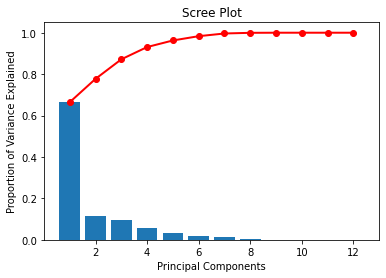

In [31]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_.cumsum(), 'ro-', linewidth=2)
plt.bar(PC_values, pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.show()

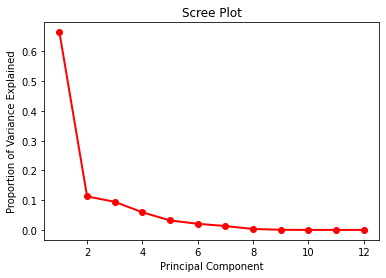

In [32]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [33]:
#Select 3 principal components with a cumulative contribution rate greater than 85%
pca = PCA(3)  
pca.fit(HOME_PCA)
low_d = pca.transform(HOME_PCA)
pd.DataFrame(low_d)
pca.components_ #Factor score matrix

array([[ 2.50788423e-03,  2.29285255e-03,  1.06630361e-03,
         4.22633791e-02,  2.67672825e-01,  2.21966484e-01,
         2.79967661e-02,  1.03487564e-02, -2.33057825e-02,
         7.25824425e-02,  9.32717121e-01,  2.48947261e-02],
       [-2.79408235e-03,  4.75647086e-04, -1.58428958e-03,
         2.09782462e-01,  5.57292158e-01, -6.20541783e-01,
        -2.56046935e-01, -8.48479501e-02, -1.01655819e-01,
        -4.20608109e-01,  1.68846988e-02,  6.68841341e-03],
       [ 1.73546451e-04,  1.54891194e-03,  8.41026409e-03,
        -1.19497596e-01, -4.46183160e-01, -5.94700540e-01,
        -3.42390866e-02,  2.37612536e-03, -4.86541684e-01,
         3.74089135e-01,  2.34464969e-01,  9.04118732e-03]])

According to the gravel map and the cumulative contribution rate, we choose 3 principal components for analysis. 

From component 1, PTS (scoring) has the greatest impact, followed by DREB (defensive efficiency), followed by AST (assist).

/Users/jamie/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


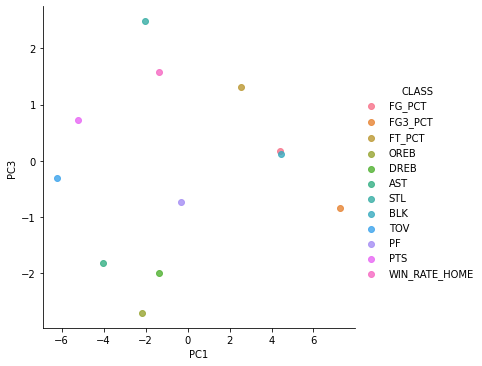

In [34]:
# Display the variables on the two-dimensional plane space composed of pc1 and pc3
def pca_scatter(pca, HOME_PCA, classifs):
    foo = pca.transform(HOME_PCA)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 2], classifs)), columns=["PC1", "PC3", "CLASS"])
    sb.lmplot("PC1", "PC3", bar, hue="CLASS", fit_reg=False)

pca_scatter(pca, HOME_PCA, HOME_PCA.columns)

<AxesSubplot:>

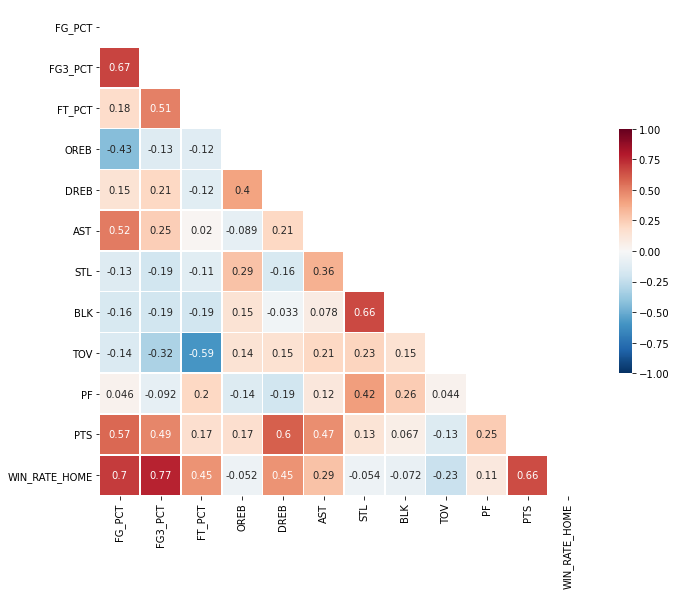

In [35]:
# Correlation matrix
corr = HOME_PCA.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sb.diverging_palette(230, 20, as_cmap=True)
sb.heatmap(corr, mask=mask, cmap='RdBu_r', annot = True, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

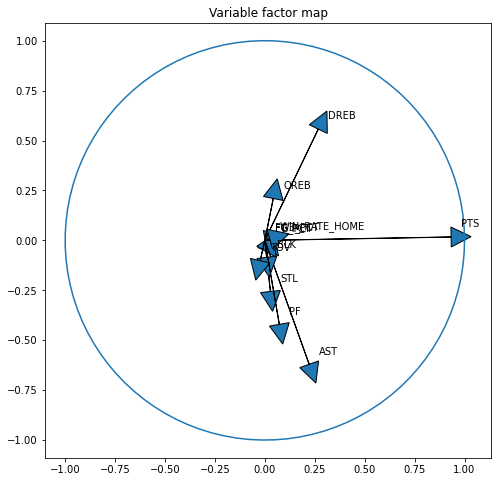

In [36]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             HOME_PCA.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

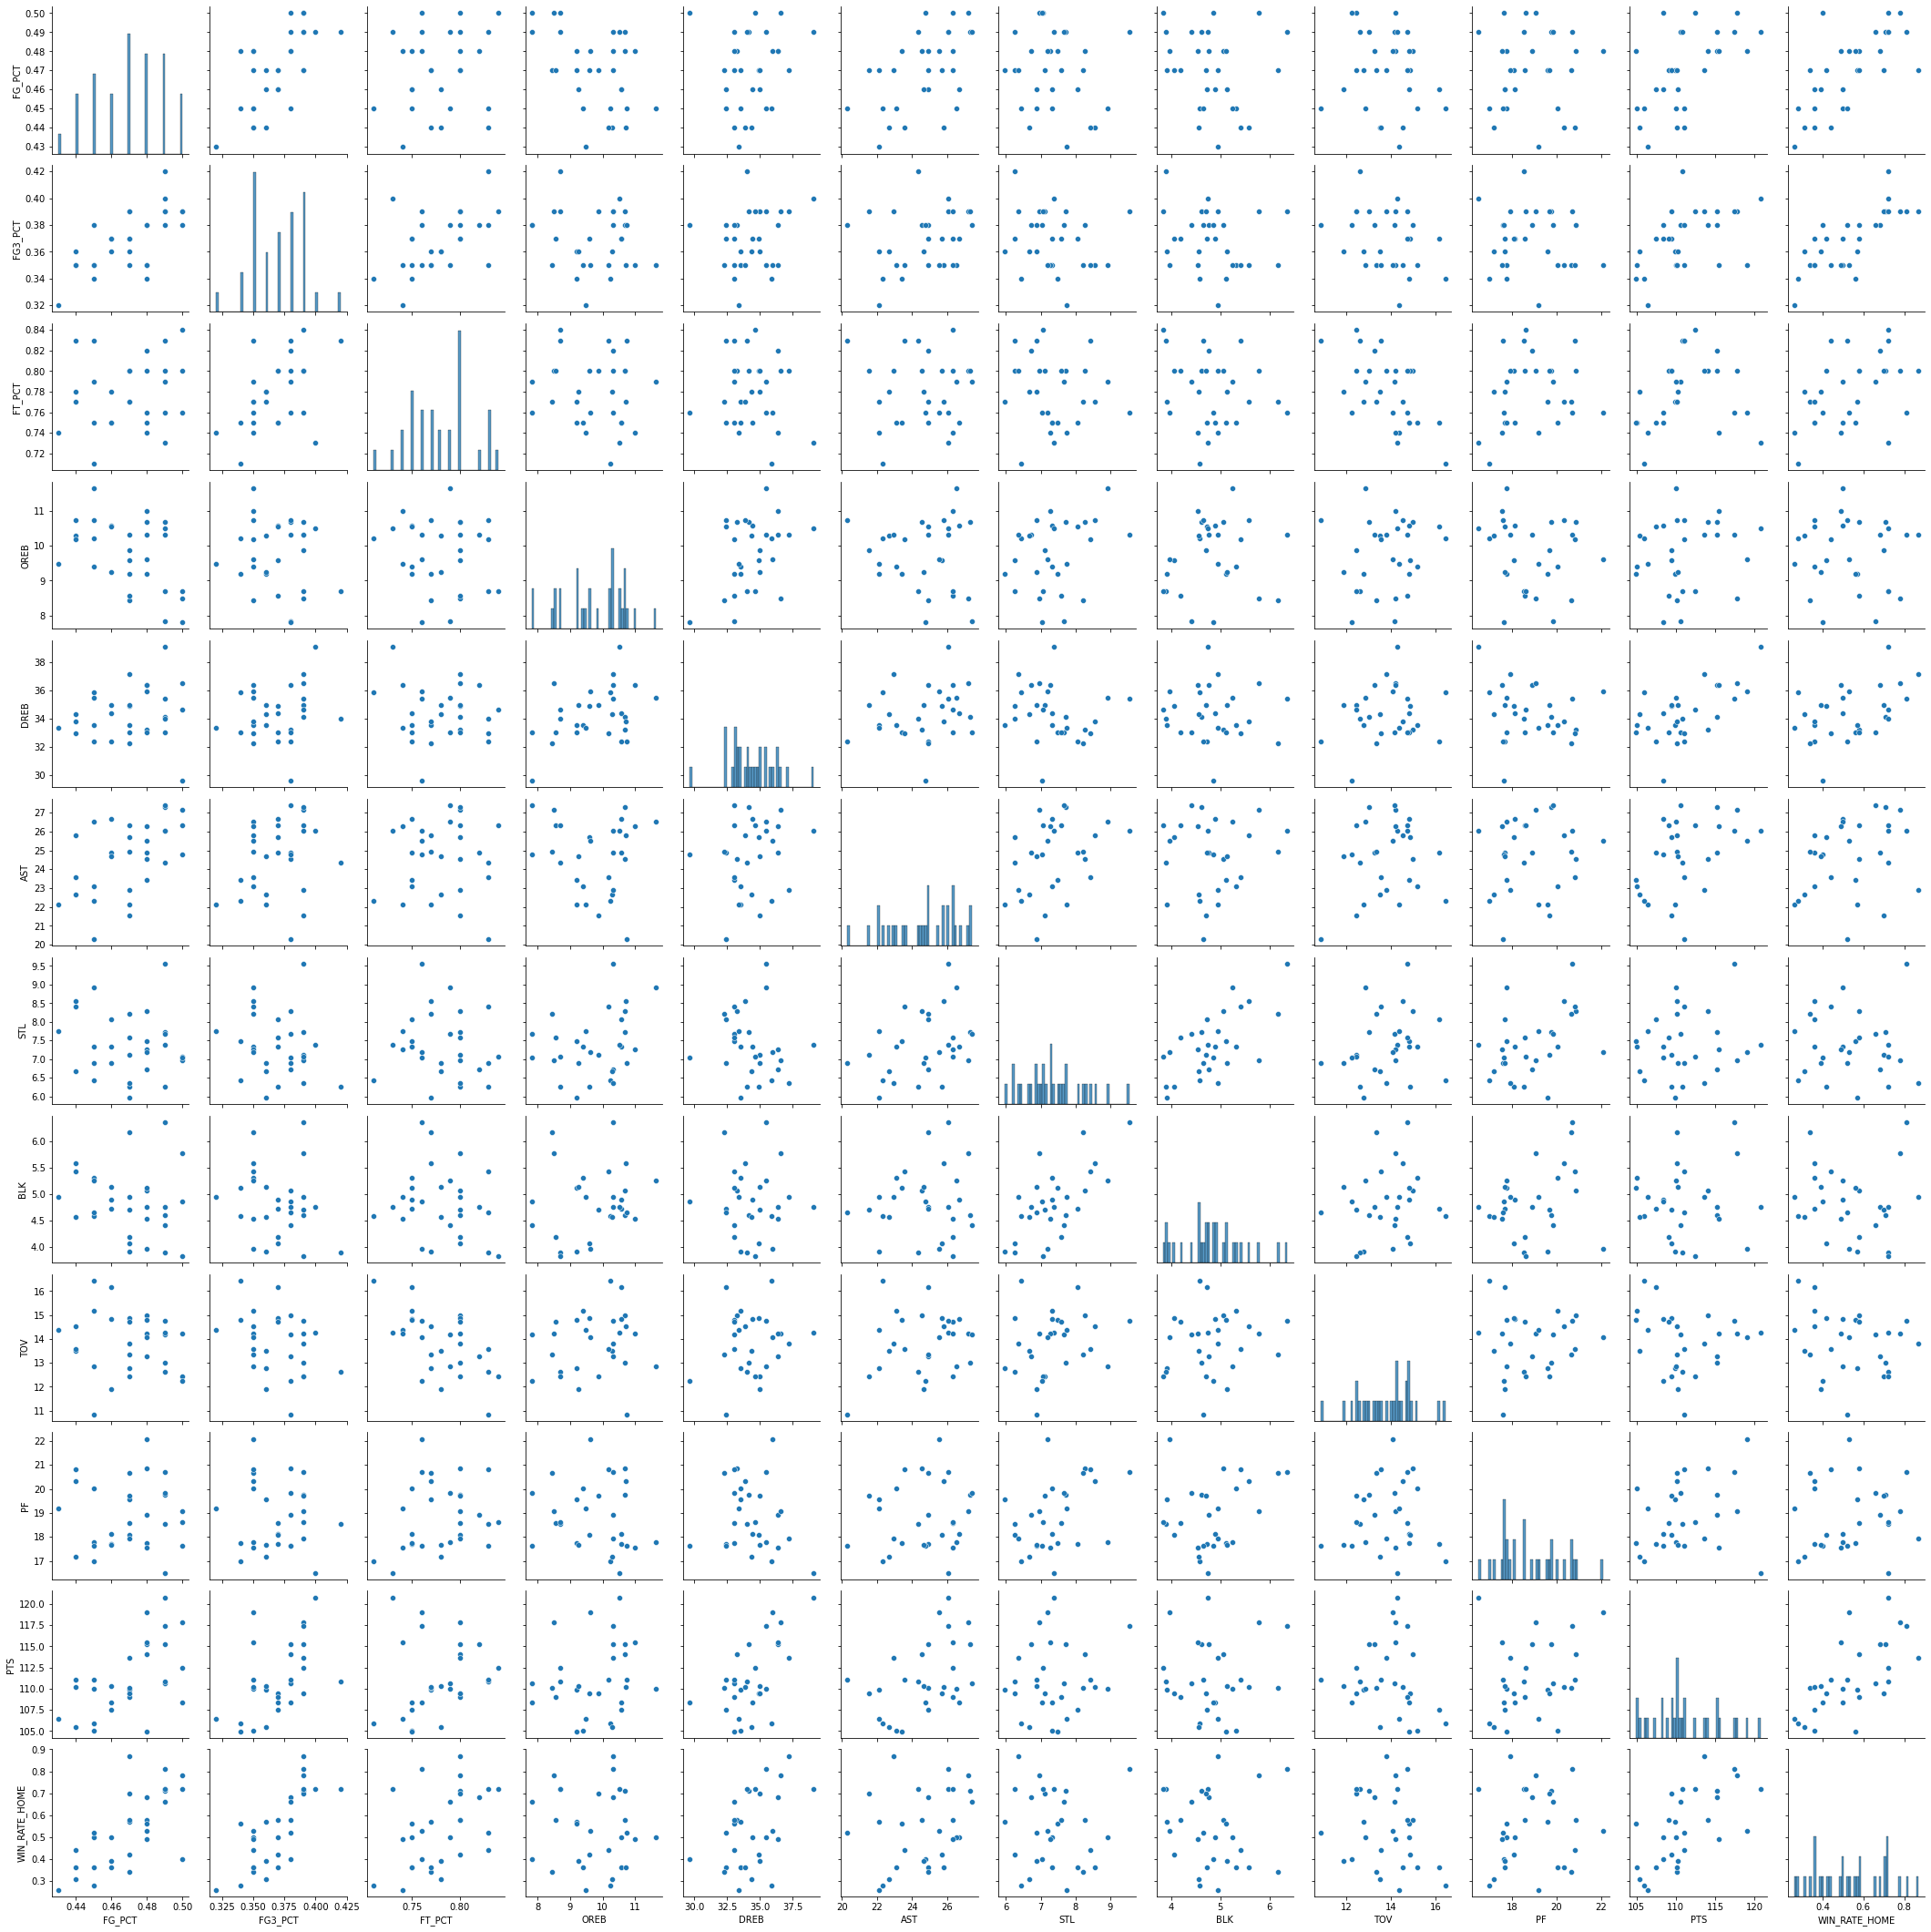

In [37]:
sb.pairplot(TABLE_HOME, diag_kws={'bins':50})

### OLS Regression

<AxesSubplot:xlabel='FG_PCT', ylabel='WIN_RATE_HOME'>

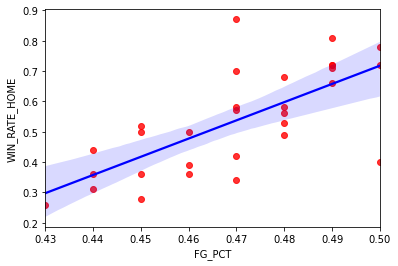

In [38]:
# With shooting as a variable, explore the relationship with winning percentage
sb.regplot(x='FG_PCT', y='WIN_RATE_HOME', data=HOME_PCA, scatter_kws={"color":"red"}, line_kws={'color':'blue'})

In [39]:
X = HOME_PCA.iloc[:, :-1].values
y = HOME_PCA[HOME_PCA.columns[-1]].values

In [40]:
# Finding the optimal model using back elimination 
X = np.append( arr = np.ones((30, 1)).astype(int) , values = X, axis = 1 )
regressor_OLS = sm.OLS(endog = y , exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     9.428
Date:                Fri, 24 Dec 2021   Prob (F-statistic):           2.17e-05
Time:                        06:42:40   Log-Likelihood:                 39.766
No. Observations:                  30   AIC:                            -55.53
Df Residuals:                      18   BIC:                            -38.72
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.0721      0.884     -5.738      0.000      -6.929      -3.215
x1             5.4099      1.745      3.100      0.006       1.743       9.077
x2             2.4375      1.289      1.890      0.075      -0.271       5.146
x3             1.4351      0.766      1.872      0.077      -0.175       3.045
x4             0.0031      0.026      0.116      0.909      -0.052       0.059
x5             0.0504      0.016      3.225      0.005       0.018       0.083
x6            -0.0234      0.013     -1.795      0.089      -0.051       0.004
x7             0.0576      0.038      1.532      0.143      -0.021       0.136
x8            -0.0076      0.036     -0.212      0.834      -0.083       0.068
x9             0.0009      0.018      0.049      0.962      -0.038       0.040
x10            0.0143      0.017      0.838      0.413      -0.022       0.050
x11           -0.0073      0.009     -0.837      0.414      -0.026       0.011
==============================================================================
Omnibus:                        2.250   Durbin-Watson:                   2.342
Prob(Omnibus):                  0.325   Jarque-Bera (JB):                2.004
Skew:                           0.592   Prob(JB):                        0.367
Kurtosis:                       2.552   Cond. No.                     1.64e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.64e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the results of OLS regression, we can see that the P value of shooting percentage and defensive efficiency are both less than 0.05, indicating that these two indicators have a significant impact on winning percentage.

### Multiple Linear Regression

In [41]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

#Predicting the test set results
Y_pred = regressor.predict(X_test)
print(Y_pred)

[0.63957208 0.64603933 0.38190971 0.17415806 0.42939467 0.41546679]


In [42]:
# Compare Actual Result with Predicted Result
print("Predicted Result","  ","Actual Result")
for i in range(len(Y_pred)):
    print("    ",round(Y_pred[i],1),"            ",Y_test[i])

Predicted Result    Actual Result
     0.6              0.58
     0.6              0.87
     0.4              0.56
     0.2              0.26
     0.4              0.39
     0.4              0.52


In [43]:
rmse_train = (np.sqrt(mean_squared_error(Y_train, regressor.predict(X_train) )))
r_squared_train = r2_score(Y_train , regressor.predict(X_train))
print("R squared for the training set")
print(r_squared_train)
print("---------------------------------")
print("RMSEfor the training set")
print(rmse_train)

R squared for the training set
0.9065467850516132
---------------------------------
RMSEfor the training set
0.04937899589193488


From the comparison of Actual Result and Predicted Result, it can be seen that the fitting effect of the model is very good, the goodness of fit reaches 90%, and the mean square error is 0.04.

When the data set is expanded in the future, the model can be used to predict the win rate of the game.

## AWAY ANALYSIS

In [44]:
AWAY_PCA = TABLE_AWAY.drop(['TEAM'], axis=1)
AWAY_PCA.head()

,FG_PCT,FG3_PCT,FT_PCT,OREB,DREB,AST,STL,BLK,TOV,PF,PTS,WIN_RATE_AWAY
0,0.46,0.36,0.81,10.64,33.31,23.14,7.11,4.67,13.03,19.36,110.67,0.46
1,0.49,0.39,0.80,9.22,33.70,25.92,6.19,4.57,12.57,18.73,117.32,0.57
2,0.46,0.37,0.76,10.46,34.19,22.68,7.08,5.57,13.35,20.00,111.43,0.43
3,0.45,0.37,0.76,10.61,31.97,27.00,8.33,4.67,14.86,17.92,110.53,0.42
4,0.48,0.36,0.79,9.64,35.72,27.83,7.14,4.39,15.33,19.75,111.92,0.44


In [45]:
pca = PCA()
pca.fit(AWAY_PCA)
pca.components_ 
pca.explained_variance_ratio_

array([7.10892053e-01, 1.16508020e-01, 6.73846256e-02, 4.28742426e-02,
       3.38472828e-02, 1.27877398e-02, 8.54721605e-03, 6.92695378e-03,
       2.11777064e-04, 1.47484088e-05, 3.74121608e-06, 1.59878764e-06])

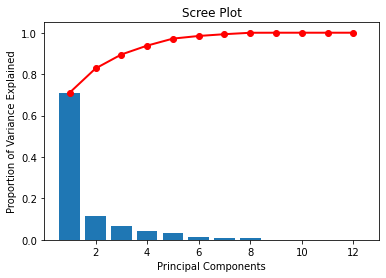

In [46]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_.cumsum(), 'ro-', linewidth=2)
plt.bar(PC_values, pca.explained_variance_ratio_)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Proportion of Variance Explained')
plt.show()

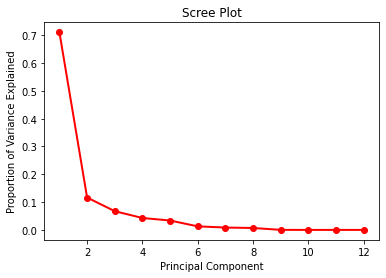

In [47]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

In [48]:
pca = PCA(3) 
pca.fit(AWAY_PCA)
low_d = pca.transform(AWAY_PCA) 
pd.DataFrame(low_d)
pca.components_

array([[-0.0024842 , -0.00223708, -0.0027125 , -0.02184557, -0.07525206,
        -0.26128668, -0.04049455, -0.02218987,  0.0475196 , -0.01682475,
        -0.95953988, -0.01343435],
       [-0.00134045,  0.00203883,  0.00304553,  0.12460874,  0.33809941,
        -0.80916114, -0.18592654,  0.03393955, -0.35371841, -0.14394284,
         0.18274635,  0.02124641],
       [ 0.00163404,  0.0033857 ,  0.00835557, -0.16489753, -0.82527256,
        -0.10997741, -0.08354626,  0.06909137, -0.51184629,  0.01475784,
         0.07463696,  0.00513194]])

Component 1 is mainly affected by PTS, followed by assists

/Users/jamie/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


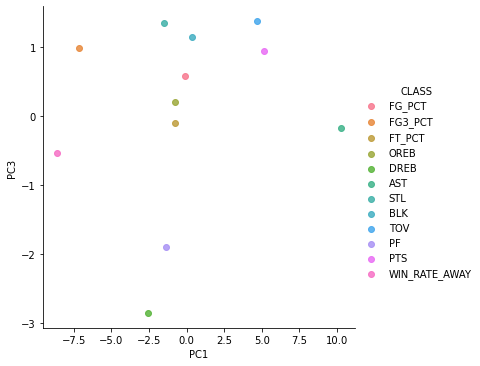

In [49]:
def pca_scatter(pca, AWAY_PCA, classifs):
    foo = pca.transform(AWAY_PCA)
    bar = pd.DataFrame(list(zip(foo[:, 0], foo[:, 2], classifs)), columns=["PC1", "PC3", "CLASS"])
    sb.lmplot("PC1", "PC3", bar, hue="CLASS", fit_reg=False)
pca_scatter(pca, AWAY_PCA, AWAY_PCA.columns)

<AxesSubplot:>

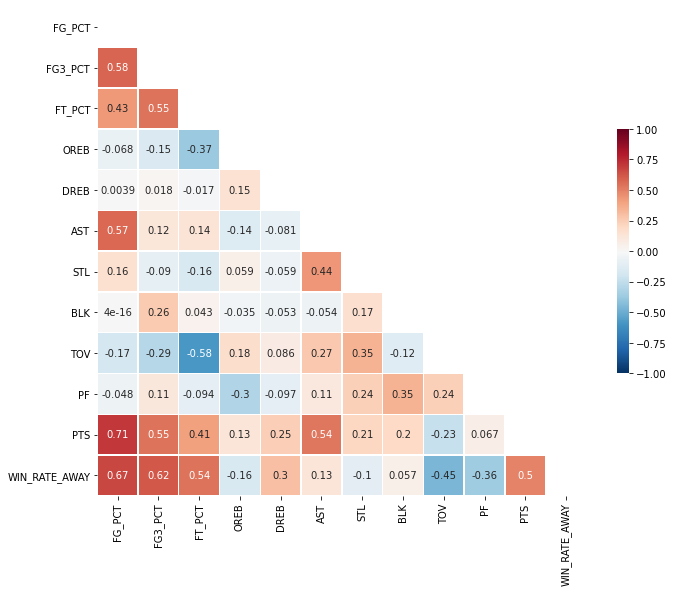

In [50]:
corr = AWAY_PCA.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sb.diverging_palette(230, 20, as_cmap=True)
sb.heatmap(corr, mask=mask, cmap='RdBu_r', annot = True, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

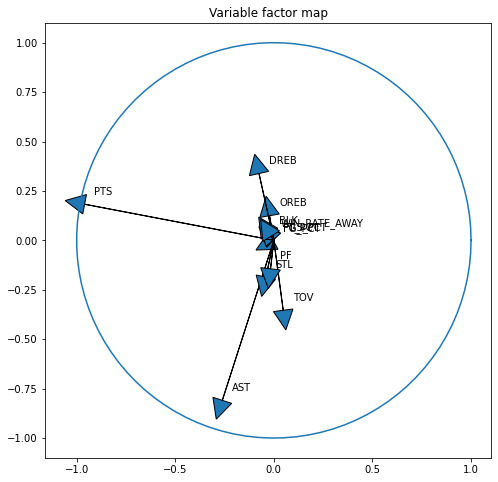

In [51]:
# Plot a variable factor map for the first two dimensions.
(fig, ax) = plt.subplots(figsize=(8, 8))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[0, i],  #0 for PC1
             pca.components_[1, i],  #1 for PC2
             head_width=0.1,
             head_length=0.1)

    plt.text(pca.components_[0, i] + 0.05,
             pca.components_[1, i] + 0.05,
             AWAY_PCA.columns.values[i])


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
ax.set_title('Variable factor map')
plt.show()

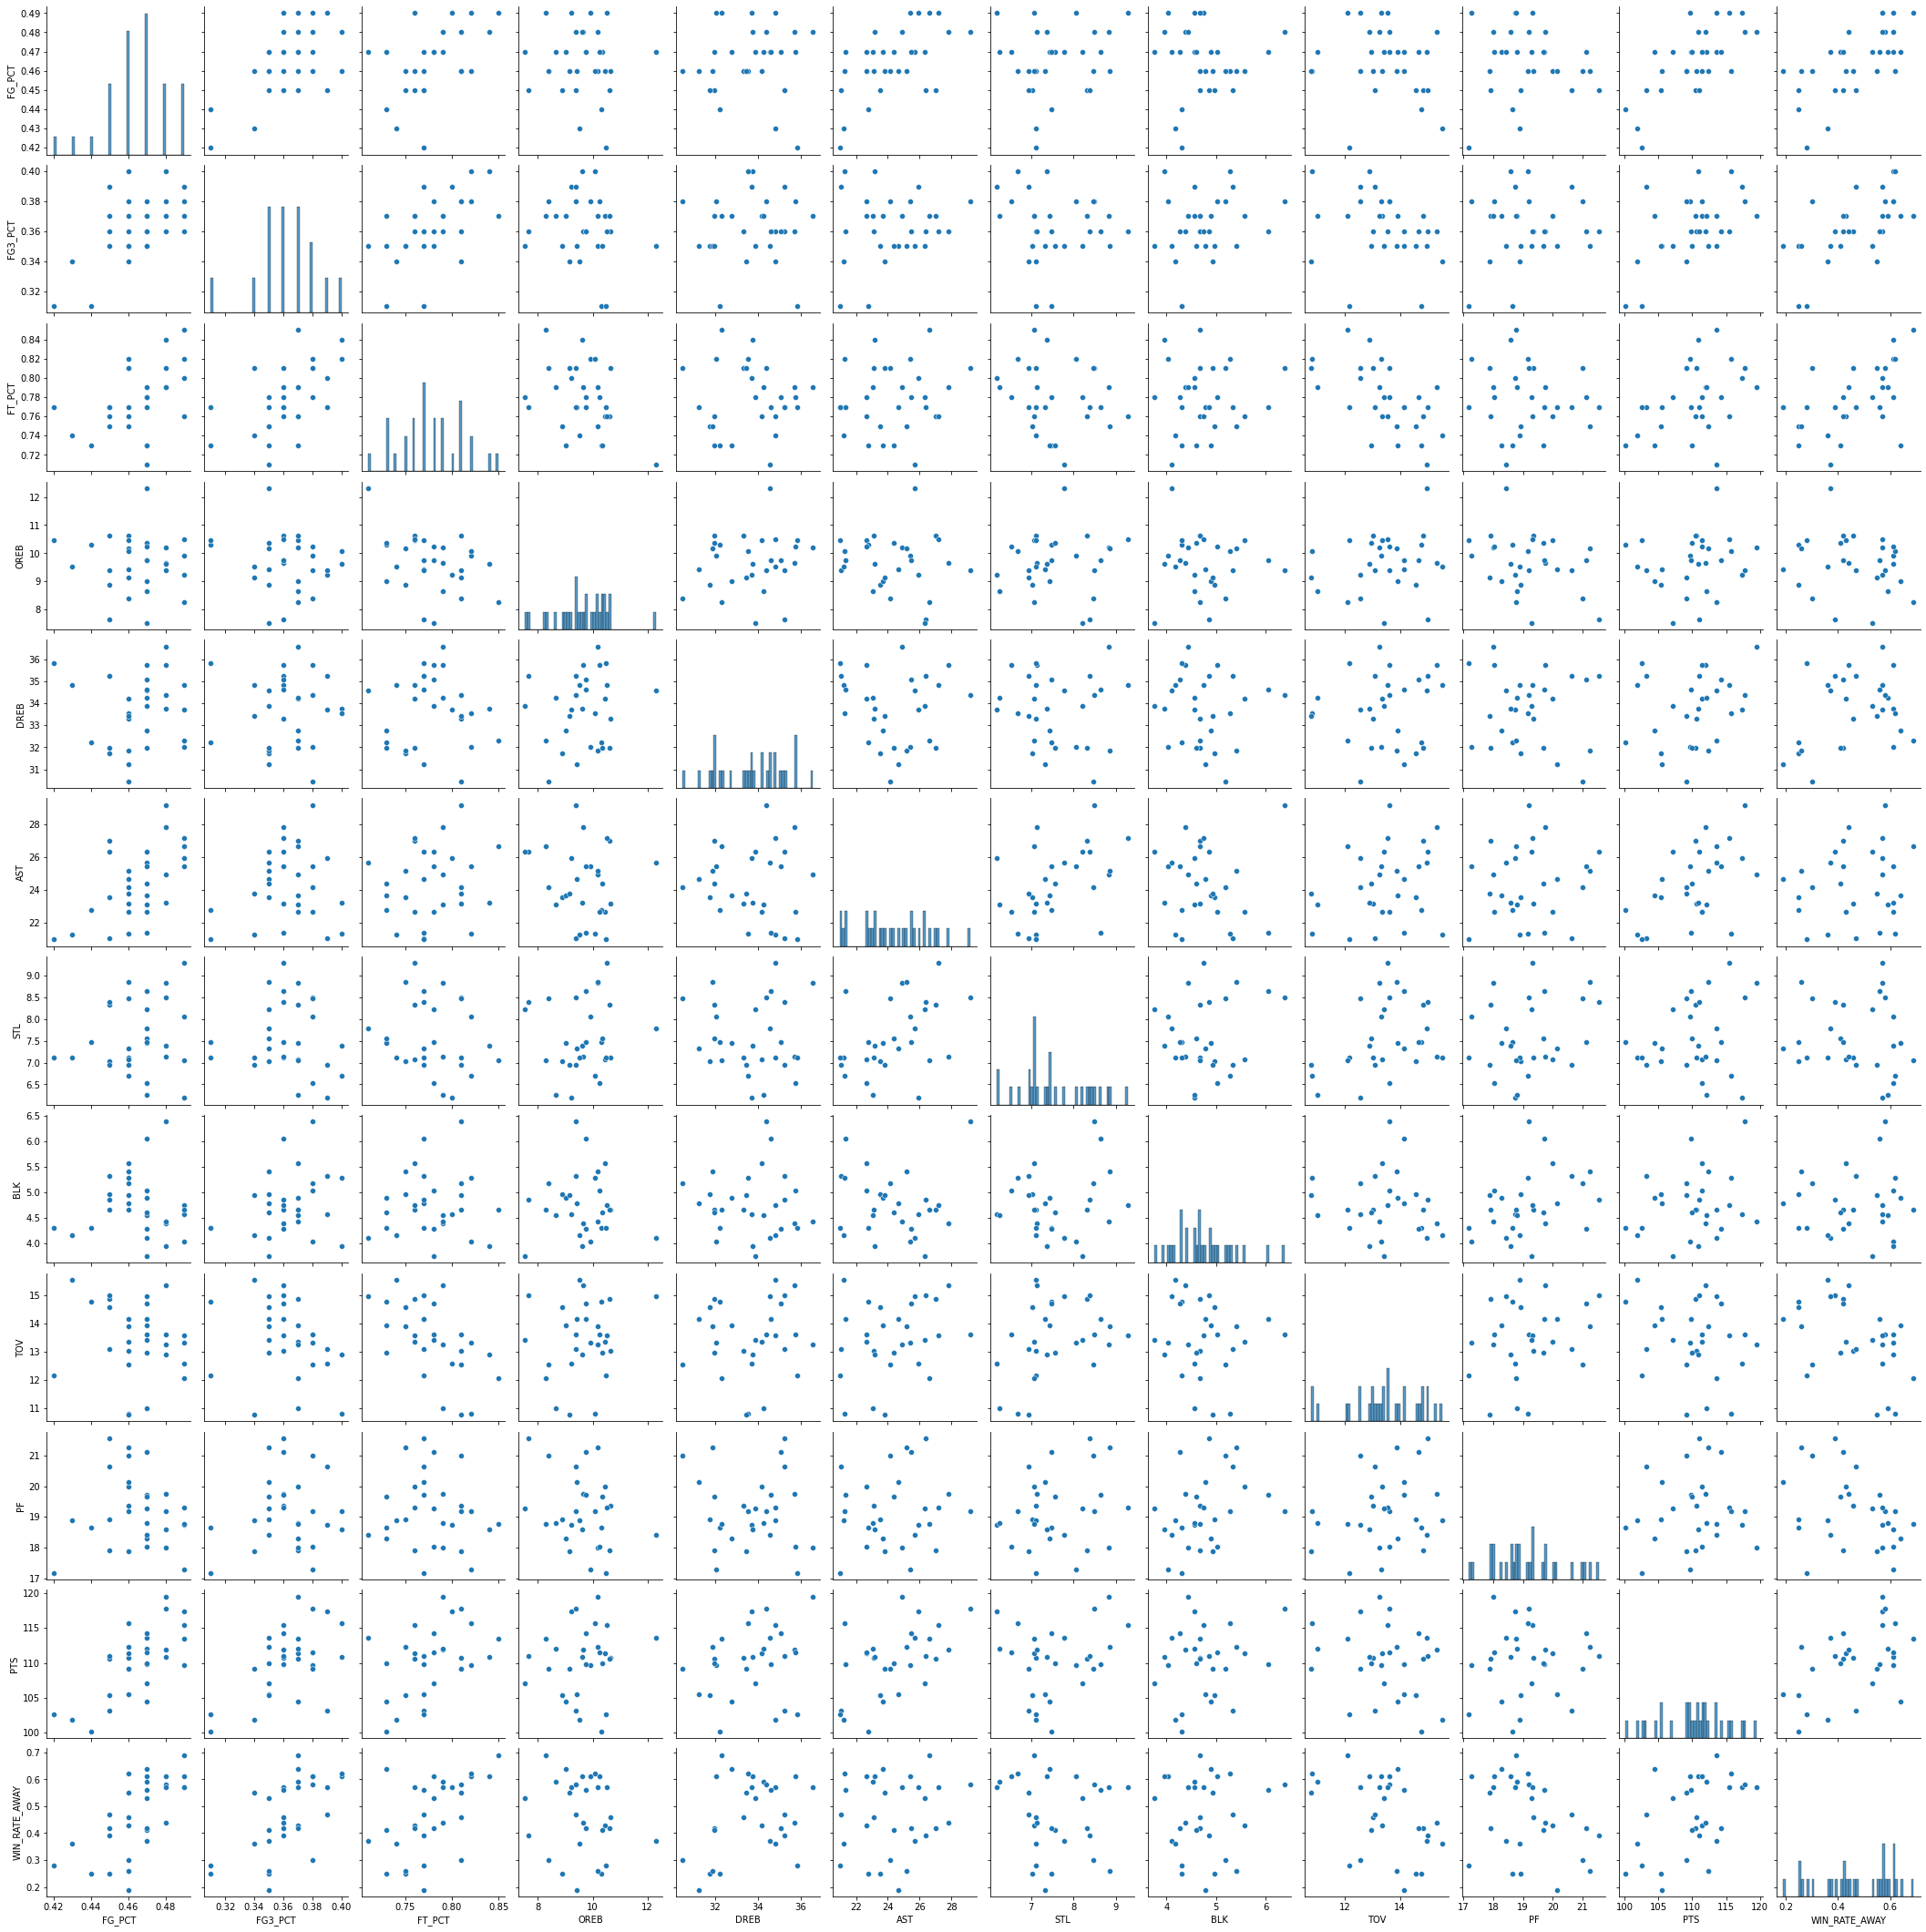

In [52]:
sb.pairplot(TABLE_AWAY, diag_kws={'bins':50})

### OLS Regression

<AxesSubplot:xlabel='FT_PCT', ylabel='WIN_RATE_AWAY'>

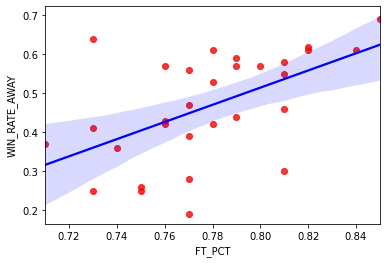

In [53]:
# Using free throw hits as a variable, explore the relationship with winning percentage
sb.regplot(x='FT_PCT', y='WIN_RATE_AWAY', data=AWAY_PCA, scatter_kws={"color":"red"}, line_kws={'color':'blue'})

In [54]:
X = AWAY_PCA.iloc[:, :-1].values
y = AWAY_PCA[AWAY_PCA.columns[-1]].values

In [55]:
# Finding the optimal model using back elimination 
X = np.append( arr = np.ones((30, 1)).astype(int) , values = X, axis = 1 )
regressor_OLS = sm.OLS(endog = y , exog = X).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     9.012
Date:                Fri, 24 Dec 2021   Prob (F-statistic):           2.98e-05
Time:                        06:42:53   Log-Likelihood:                 45.326
No. Observations:                  30   AIC:                            -66.65
Df Residuals:                      18   BIC:                            -49.84
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.4298      0.741     -1.929      0.070      -2.987       0.127
x1             4.4577      1.334      3.342      0.004       1.655       7.260
x2             2.0793      0.970      2.145      0.046       0.042       4.116
x3            -0.1604      0.602     -0.266      0.793      -1.425       1.104
x4            -0.0319      0.019     -1.661      0.114      -0.072       0.008
x5             0.0294      0.010      2.903      0.009       0.008       0.051
x6            -0.0065      0.012     -0.564      0.580      -0.031       0.018
x7             0.0128      0.020      0.658      0.519      -0.028       0.054
x8             0.0240      0.026      0.941      0.359      -0.030       0.078
x9            -0.0210      0.017     -1.211      0.241      -0.057       0.015
x10           -0.0482      0.015     -3.264      0.004      -0.079      -0.017
x11           -0.0030      0.006     -0.485      0.634      -0.016       0.010
==============================================================================
Omnibus:                        1.232   Durbin-Watson:                   2.199
Prob(Omnibus):                  0.540   Jarque-Bera (JB):                1.157
Skew:                          -0.346   Prob(JB):                        0.561
Kurtosis:                       2.332   Cond. No.                     1.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Multiple Linear Regression

In [56]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, Y_train)

#Predicting the test set results
Y_pred = regressor.predict(X_test)
print(Y_pred)

[0.42180598 0.61062522 0.55434307 0.3805709  0.50004381 0.51645242]


In [57]:
print("Predicted Result","  ","Actual Result")
for i in range(len(Y_pred)):
    print("    ",round(Y_pred[i],1),"            ",Y_test[i])

Predicted Result    Actual Result
     0.4              0.43
     0.6              0.61
     0.6              0.64
     0.4              0.25
     0.5              0.55
     0.5              0.62


In [58]:
rmse_train = (np.sqrt(mean_squared_error(Y_train, regressor.predict(X_train) )))
r_squared_train = r2_score(Y_train , regressor.predict(X_train))
print("R squared for the training set")
print(r_squared_train)
print("---------------------------------")
print("RMSEfor the training set")
print(rmse_train)

R squared for the training set
0.8639365635117778
---------------------------------
RMSEfor the training set
0.04901590586218208


From the results of principal component analysis, OLS regression, and Multiple Linear Regression, it can be seen that the key factor of winning rate is undeniably determined by the score. But defensive efficiency, assists, and shooting all have a significant impact on the winning rate of the game. This shows that the so-called defender wins the world, high-intensity defense, teamwork and good shooting feel are the keys to winning the game.

# TASK 3

Because there are too many missing values in the pbp.csv data in dataset(2), and the results in task1 and dataset(3) are used for analysis.

In [59]:
pbp = pd.read_csv('datasets/2019-20_pbp.csv')
pbp.isnull().sum()

URL                        0
GameType                   0
Location                   0
Date                       0
Time                       0
WinningTeam                0
Quarter                    0
SecLeft                    0
AwayTeam                   0
AwayPlay              266876
AwayScore                  0
HomeTeam                   0
HomePlay              272397
HomeScore                  0
Shooter               336868
ShotType              336868
ShotOutcome           336868
ShotDist              336868
Assister              483770
Blocker               528167
FoulType              490601
Fouler                490601
Fouled                491650
Rebounder             417981
ReboundType           417981
ViolationPlayer       537285
ViolationType         537285
TimeoutTeam           526517
FreeThrowShooter      486295
FreeThrowOutcome      486295
FreeThrowNum          486295
EnterGame             483517
LeaveGame             483517
TurnoverPlayer        506198
TurnoverType  

Because of the mixing of strings and numbers, effective analysis cannot be performed, 
and only the data of ShotOutcome and FreeThrowOutcome are composed of make, miss, and null. 
Even if the data is converted into a numerical type that is easy to analyze, 
there is only the case of pitching, which does not represent the comprehensive situation. 
And so on, there are similar situations in other data.

In [60]:
pbp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539265 entries, 0 to 539264
Data columns (total 41 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   URL                 539265 non-null  object 
 1   GameType            539265 non-null  object 
 2   Location            539265 non-null  object 
 3   Date                539265 non-null  object 
 4   Time                539265 non-null  object 
 5   WinningTeam         539265 non-null  object 
 6   Quarter             539265 non-null  int64  
 7   SecLeft             539265 non-null  int64  
 8   AwayTeam            539265 non-null  object 
 9   AwayPlay            272389 non-null  object 
 10  AwayScore           539265 non-null  int64  
 11  HomeTeam            539265 non-null  object 
 12  HomePlay            266868 non-null  object 
 13  HomeScore           539265 non-null  int64  
 14  Shooter             202397 non-null  object 
 15  ShotType            202397 non-nul

In [61]:
advanced = pd.read_csv('datasets/nba2021_advanced.csv')
advanced.head()

,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,FTr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Precious Achiuwa,PF,21,MIA,28,408,15.1,0.599,0.000,0.541,...,16.1,19.7,0.3,0.6,0.9,0.101,-2.8,-0.2,-3.0,-0.1
1,Jaylen Adams,PG,24,MIL,6,17,-6.9,0.125,0.250,0.000,...,0.0,19.7,-0.1,0.0,-0.1,-0.265,-15.6,-5.2,-20.9,-0.1
2,Steven Adams,C,27,NOP,27,760,15.9,0.592,0.006,0.397,...,20.1,12.8,1.2,0.5,1.7,0.109,-0.1,-1.0,-1.1,0.2
3,Bam Adebayo,C,23,MIA,26,873,22.7,0.641,0.015,0.469,...,16.2,24.6,2.3,1.3,3.6,0.196,2.9,2.0,4.9,1.5
4,LaMarcus Aldridge,C,35,SAS,18,480,15.2,0.542,0.298,0.093,...,6.4,22.3,0.2,0.5,0.7,0.075,0.3,-1.0,-0.7,0.2


<AxesSubplot:xlabel='DBPM', ylabel='PER'>

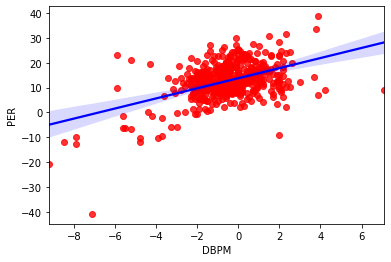

In [62]:
# Explore the relationship between PER and other variables
sb.regplot(x='DBPM', y='PER', data=advanced, scatter_kws={"color":"red"}, line_kws={'color':'blue'})

<AxesSubplot:>

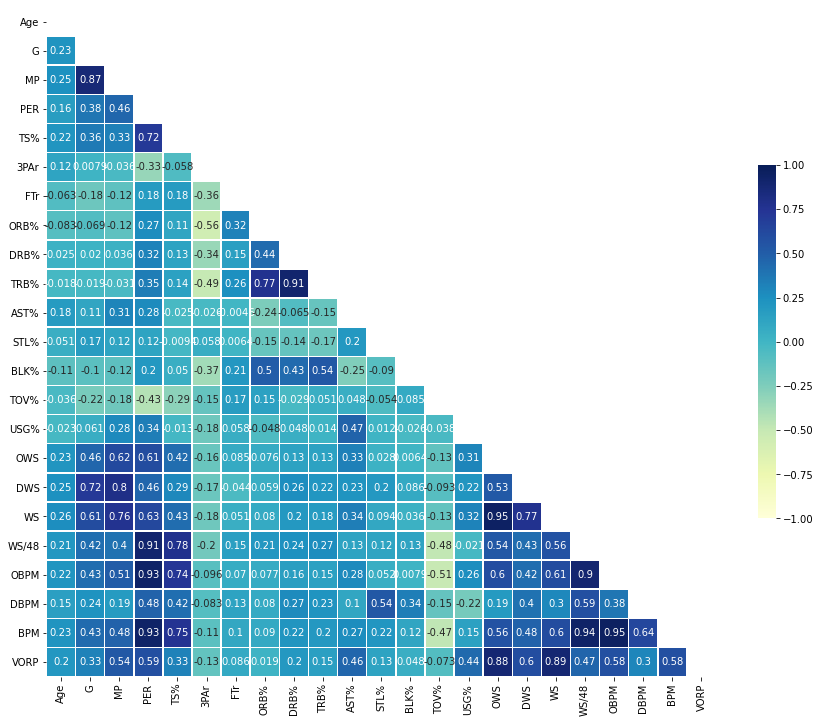

In [63]:
# Compute the correlation matrix
corr = advanced.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 13))

# Generate a custom diverging colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sb.heatmap(corr, mask=mask, cmap='YlGnBu', annot = True, vmax=1, vmin = -1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

According to relevant literature and sports reports, PER and EFF have the same meaning. The calculation method of PER uses more variables, which reflects that the information it contains is more comprehensive. Moreover, it is known from the above correlation matrix that PER has a higher correlation with more variables. If all variables are included in the calculation, data will be redundant.

Because the winning or losing of the game depends not only on excellent offensive ability, but also on defensive ability. There are also many potential factors, such as teamwork, star players, etc. Since these data are not included in the data set, here, we choose PER , OWS, DWS, TS%, and give these four indicators a certain weight to measure the comprehensive ability of the players, in order to find the most important player of each team based on the calculated score.

In [64]:
advanced['score'] = 0.25*(advanced['PER']+advanced['OWS']+advanced['DWS']+advanced['TS%'])

In [65]:
Team_Max = advanced.sort_values(by = "score", ascending = False).groupby('Tm', as_index=False).first()
Team_Max

,Tm,Player,Pos,Age,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,score
0,ATL,Trae Young,PG,22,26,901,22.9,0.598,0.349,0.577,...,32.5,2.7,0.5,3.1,0.168,5.8,-1.5,4.3,1.4,6.67450
1,BOS,Robert Williams,C,23,21,317,24.1,0.731,0.013,0.312,...,14.8,0.8,0.7,1.5,0.227,1.8,2.3,4.1,0.5,6.58275
2,BRK,Kyrie Irving,PG,28,20,707,25.3,0.647,0.346,0.213,...,29.6,2.6,0.4,3.0,0.203,6.1,-0.8,5.3,1.3,7.23675
3,CHI,Zach LaVine,SG,25,27,962,22.7,0.649,0.420,0.272,...,30.7,2.3,0.9,3.1,0.156,4.9,-0.8,4.1,1.5,6.63725
4,CHO,Vernon Carey Jr.,C,19,3,6,29.8,0.387,0.333,0.667,...,27.5,0.0,0.0,0.0,0.197,7.5,-0.1,7.4,0.0,7.54675
5,CLE,Jarrett Allen,C,22,16,414,23.5,0.675,0.032,0.568,...,18.4,1.3,0.4,1.7,0.197,3.2,0.2,3.4,0.6,6.46875
6,DAL,Luka Dončić,PG,21,27,954,26.8,0.586,0.340,0.392,...,36.0,2.5,0.8,3.4,0.170,6.8,1.0,7.8,2.4,7.67150
7,DEN,Nikola Jokić,C,25,28,1006,31.4,0.656,0.207,0.300,...,29.4,4.9,1.4,6.3,0.300,9.1,2.3,11.4,3.4,9.58900
8,DET,Jerami Grant,SF,26,28,1017,18.7,0.579,0.373,0.343,...,26.5,1.9,0.9,2.7,0.130,3.2,-0.6,2.6,1.1,5.51975
9,GSW,Stephen Curry,PG,32,29,987,25.6,0.661,0.578,0.261,...,32.2,3.1,1.2,4.3,0.210,7.5,0.0,7.6,2.4,7.64025


When PER is used as an indicator to measure, the players obtained are consistent with the above-mentioned existence, which further verifies the comprehensiveness of the PER indicator.

In [66]:
Team_Max2 = advanced.sort_values(by = "PER", ascending = False).groupby('Tm', as_index=False).first()
Team_Max2

,Tm,Player,Pos,Age,G,MP,PER,TS%,3PAr,FTr,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,score
0,ATL,Clint Capela,C,26,25,732,23.1,0.582,0.000,0.282,...,19.9,1.4,1.3,2.7,0.179,2.0,0.4,2.4,0.8,6.59550
1,BOS,Robert Williams,C,23,21,317,24.1,0.731,0.013,0.312,...,14.8,0.8,0.7,1.5,0.227,1.8,2.3,4.1,0.5,6.58275
2,BRK,Kyrie Irving,PG,28,20,707,25.3,0.647,0.346,0.213,...,29.6,2.6,0.4,3.0,0.203,6.1,-0.8,5.3,1.3,7.23675
3,CHI,Zach LaVine,SG,25,27,962,22.7,0.649,0.420,0.272,...,30.7,2.3,0.9,3.1,0.156,4.9,-0.8,4.1,1.5,6.63725
4,CHO,Vernon Carey Jr.,C,19,3,6,29.8,0.387,0.333,0.667,...,27.5,0.0,0.0,0.0,0.197,7.5,-0.1,7.4,0.0,7.54675
5,CLE,Jarrett Allen,C,22,16,414,23.5,0.675,0.032,0.568,...,18.4,1.3,0.4,1.7,0.197,3.2,0.2,3.4,0.6,6.46875
6,DAL,Luka Dončić,PG,21,27,954,26.8,0.586,0.340,0.392,...,36.0,2.5,0.8,3.4,0.170,6.8,1.0,7.8,2.4,7.67150
7,DEN,Nikola Jokić,C,25,28,1006,31.4,0.656,0.207,0.300,...,29.4,4.9,1.4,6.3,0.300,9.1,2.3,11.4,3.4,9.58900
8,DET,Jerami Grant,SF,26,28,1017,18.7,0.579,0.373,0.343,...,26.5,1.9,0.9,2.7,0.130,3.2,-0.6,2.6,1.1,5.51975
9,GSW,Stephen Curry,PG,32,29,987,25.6,0.661,0.578,0.261,...,32.2,3.1,1.2,4.3,0.210,7.5,0.0,7.6,2.4,7.64025


We further explored the distribution of the most important players of each team. It is not difficult to find that the point guard is the brain of the team and is vital, followed by the center.

In [67]:
Pos_count = Team_Max.groupby('Pos').count()
Pos_count = Pos_count.iloc[:,:1]
Pos_count.rename(columns={'Tm':'COUNT'},inplace=True)
Pos_count.reset_index(inplace=True)
Pos_count = Pos_count.sort_values(by = "COUNT", ascending = False)
Pos_count.head()

,Pos,COUNT
0,C,13
2,PG,7
1,PF,5
3,SF,3
4,SG,3


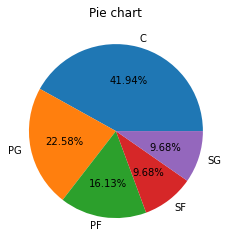

In [68]:
labels = Pos_count['Pos']
X = Pos_count['COUNT']

fig = plt.figure()
plt.pie(X,labels=labels,autopct='%1.2f%%')
plt.title("Pie chart")
plt.show()  